## Prodigy Infotech Internship Task-3

<img src = 'Task-3.png'>

Build a a decision tree classifier to predict wheter a customer will purchase a product or service based on their demographic or behavioral data.



#

### ABOUT THE DATA-SET

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

| Variable Name  | Role   | Type      | Demographic         | Description                                                                                               | Units    | Missing Values |
|----------------|--------|-----------|---------------------|-----------------------------------------------------------------------------------------------------------|----------|-----------------|
| age            | Feature| Integer   | Age                 | Age of the client                                                                                          |          | no              |
| job            | Feature| Categorical| Occupation          | Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |          | no              |
| marital        | Feature| Categorical| Marital Status      | Marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) |          | no              |
| education      | Feature| Categorical| Education Level     | Education level (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') |          | no              |
| default        | Feature| Binary    |                     | Has credit in default?                                                                                     |          | no              |
| balance        | Feature| Integer   |                     | Average yearly balance (euros)                                                                              | euros    | no              |
| housing        | Feature| Binary    |                     | Has housing loan?                                                                                          |          | no              |
| loan           | Feature| Binary    |                     | Has personal loan?                                                                                         |          | no              |
| contact        | Feature| Categorical|                     | Contact communication type (categorical: 'cellular','telephone')                                            |          | yes             |
| day_of_week    | Feature| Date      |                     | Last contact day of the week                                                                                |          | no              |
| month          | Feature| Date      |                     | Last contact month of the year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                       |          | no              |
| duration       | Feature| Integer   |                     | Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). | seconds  | no              |
| campaign       | Feature| Integer   |                     | Number of contacts performed during this campaign and for this client (numeric, includes last contact)    |          | no              |
| pdays          | Feature| Integer   |                     | Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted) |          | yes             |
| previous       | Feature| Integer   |                     | Number of contacts performed before this campaign and for this client                                      |          | no              |
| poutcome       | Feature| Categorical|                     | Outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                |          | yes             |
| y              | Target | Binary    |                     | Has the client subscribed a term deposit?                                                                   |          | no              |


### Dataset Overview

The dataset contains information about clients and whether they subscribed to a term deposit (yes/no), which is the target variable you're trying to predict. You have several features (columns) in the dataset that provide insights about each client, and these can help you predict whether a client will subscribe to a term deposit or not.

dataset source : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Objectives:

- Predict Client Subscription: To build a predictive model that can determine whether a client will subscribe to a term deposit based on demographic and behavioral features.

- Feature Analysis: To analyze the dataset and identify the most influential features (e.g., age, balance, job) that contribute to the likelihood of a client subscribing to a term deposit.

- Develop a Decision Tree Classifier: To implement a Decision Tree Classifier using Python’s machine learning libraries, specifically targeting the prediction of the binary outcome (subscribe or not).

- Evaluate Model Performance: To evaluate the performance of the model using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score.

- Optimize Model: To fine-tune the model by adjusting parameters like max_depth or min_samples_split and by utilizing techniques such as cross-validation for better performance.



### Expected Outcomes:

- Trained Decision Tree Classifier: A well-trained Decision Tree Classifier capable of predicting whether a client will subscribe to a term deposit based on their attributes.

- Feature Importance Insights: Identification of the most critical features influencing client subscription decisions (e.g., balance, job, marital status) and their respective importance in the model.

- Model Performance Metrics: A set of performance metrics (accuracy, precision, recall, F1-score) that help gauge how well the model performs on the test dataset.

- Improved Prediction Accuracy: By tuning the decision tree parameters and using feature selection, the model’s prediction accuracy should be optimized.

- Visualization of Decision Tree: A graphical representation of the decision tree to provide a clear understanding of how the model makes decisions based on the features.



### Methodology:

#### Data Collection and Preprocessing:

- Dataset: The project will use the Bank Marketing Dataset which includes various client features such as age, job type, marital status, balance, and previous marketing campaign results.
- Data Cleaning: Handling missing values using techniques such as imputation or removing irrelevant rows/columns.
- Feature Encoding: Categorical variables like job, marital status, and others will be encoded using techniques like One-Hot Encoding or Label Encoding to convert them into a format suitable for machine learning models.
- Feature Scaling: If necessary, numerical features such as age or balance will be scaled for better performance of the classifier.

#### Feature Selection and Engineering:

 Identify key features that have a significant impact on the target variable (whether a client will subscribe to a term deposit). These include:

- Job: Different job types may have different propensities for subscribing.
- Balance: Higher account balance might increase the chances of subscribing to a term deposit.
- Previous Campaign Outcomes: The outcome of previous marketing campaigns (success, failure) will be a strong indicator.

Perform feature selection to reduce redundancy and retain only the most important features.

#### Model Training:

- Decision Tree Classifier: Use the Decision Tree Classifier as the model to predict whether a client will subscribe to a term deposit based on the selected features.
- Model Tuning: Hyperparameters such as max_depth, min_samples_split, and min_samples_leaf will be tuned to improve the model's accuracy and reduce overfitting.
- Split the data into training and testing sets (e.g., 80% training and 20% testing) for evaluating model performance.

#### Model Evaluation:

- After training the decision tree, evaluate the model’s performance using various metrics such as accuracy, precision, recall, and F1-score.




#

#

#

### Importing required libraries

In [194]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score , classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler ,OneHotEncoder
from sklearn.model_selection import train_test_split , GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings("ignore")
sns.set_palette("viridis")


In [195]:
#loading and viewing the dataset

df = pd.read_csv('bank-data.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [196]:
# lets check the shape 

df.shape

(4521, 17)

In [197]:
# Lets check the Data    

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Lets Check for nulls

In [198]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [199]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


#### There are no duplicates and no nulls in the dataset   

#

#

## Exploratory Data Analysis

#

#### Numerical Analysis of Train Data Continuous Variables

In [200]:
df[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


#### Number of Subscribers

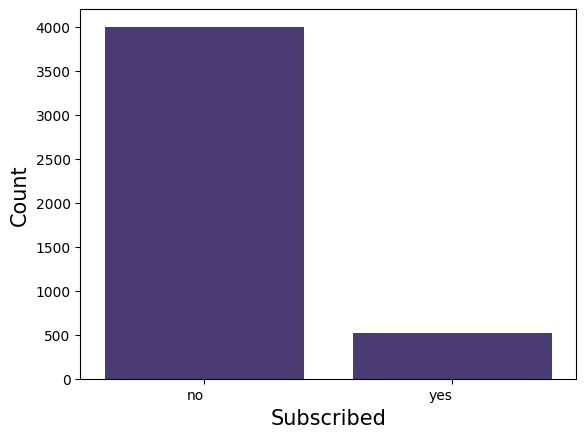

In [201]:
sns.countplot(x = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Subscribed', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()


In [202]:
df['y'].value_counts(normalize=True)*100

y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64

**Out of all the people only Around 12% have subscribed to the term deposit**

#### Binning of Age for Analysis

In [203]:
age_group_train = []
for i in df['age']:
    if (i >= 18 and i <= 25):
        age_group_train.append('18-25')
    elif (i >= 26 and i <= 33):
        age_group_train.append('26-33')
    elif (i >= 34 and i <= 41):
        age_group_train.append('34-41')
    elif (i >= 42 and i <= 49):
        age_group_train.append('42-49')
    elif (i >= 50 and i <= 57):
        age_group_train.append('50-57')
    elif (i >= 58 and i <= 65):
        age_group_train.append('58-65')
    elif (i >= 66 and i <= 73):
        age_group_train.append('66-73')
    elif (i >= 74 and i <= 81):
        age_group_train.append('74-81')
    elif (i >= 82 and i <= 89):
        age_group_train.append('82-89')
    elif (i >= 90 and i <= 97):
        age_group_train.append('90-97')
    else:
        pass
df['age_group'] = age_group_train



#### Relation Between Age Group and Subscription¶

Text(0, 0.5, 'Count')

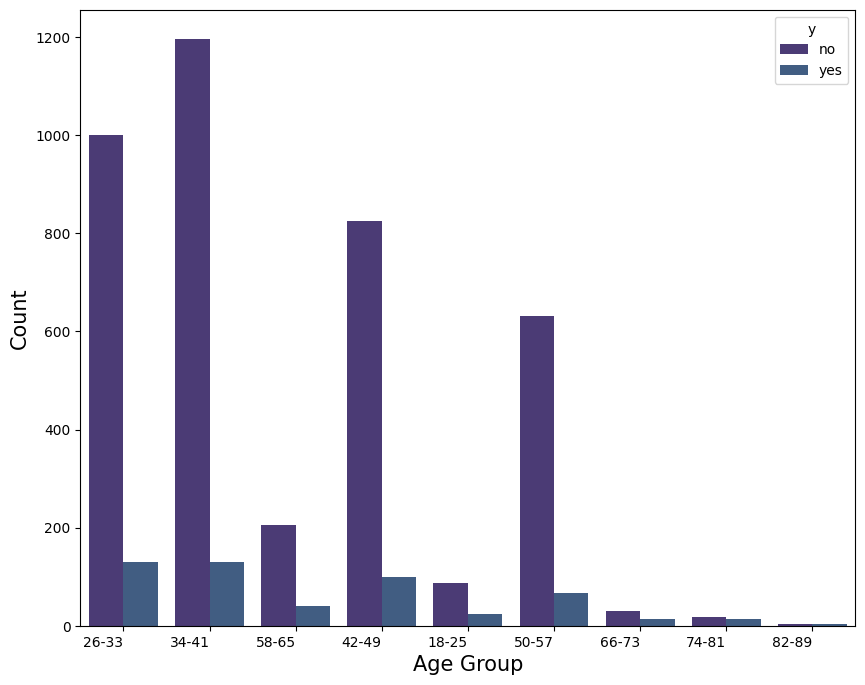

In [204]:
plt.figure(figsize = (10, 8))
sns.countplot(x ='age_group', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

#### As Extreme the age i.e on the higher or lower side,  lower the chances of subscribing . 

- 28% of subscribers are between 26-33 years of age.
- 57% of subscribers are between 26-41 years of age.
- 72% of subscribers are between 26-49 years of age.
- 85% of subscribers are between 26-57 years of age.

### Distribution of Age

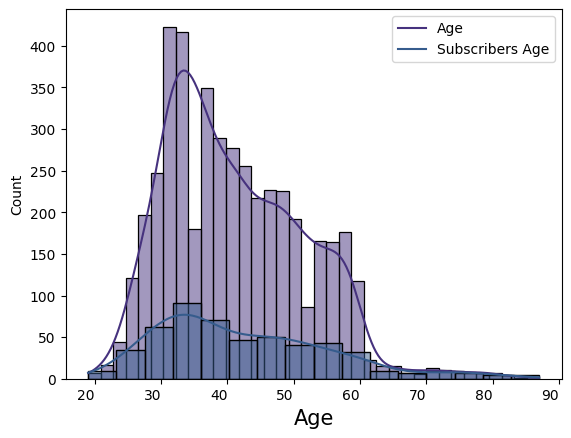

In [205]:
sns.histplot(df['age'] , kde=True)
sns.histplot(df[df['y']=='yes']['age'] , kde=True)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Age', fontsize = 15)
plt.legend(['Age', 'Subscribers Age'])
plt.show()

**Similar Distribution: The shape of the two distributions is quite similar almost like a normal distribution**

- Subscribers age reveals it is around 27-65 anything before and after is very rare.


#### Relation Between Type of Job and Subscription

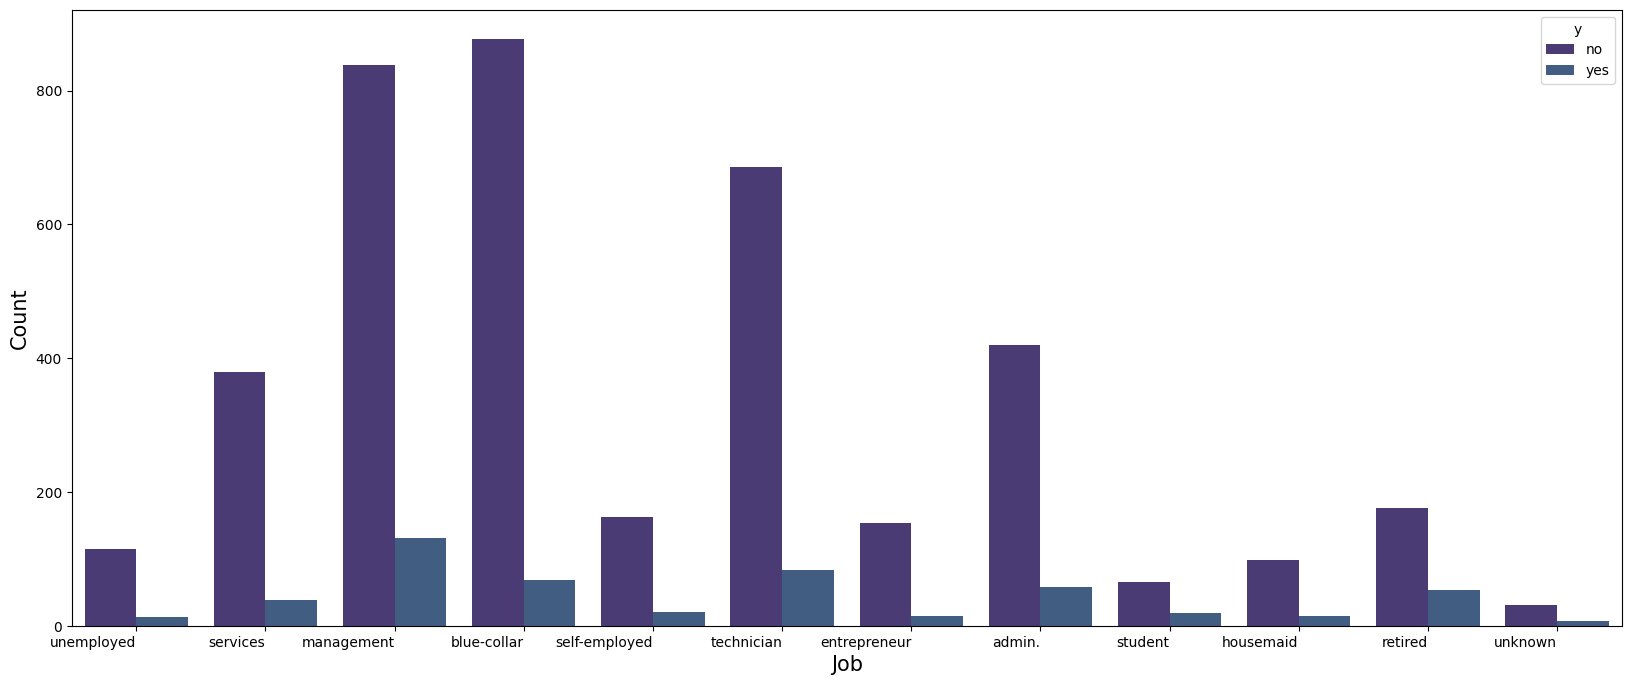

In [206]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='job', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Job', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [207]:
(df[df['y'] == 'yes']['job'].value_counts() / 521 )*100

job
management       25.143954
technician       15.930902
blue-collar      13.243762
admin.           11.132438
retired          10.364683
services          7.293666
self-employed     3.838772
student           3.646833
entrepreneur      2.879079
housemaid         2.687140
unemployed        2.495202
unknown           1.343570
Name: count, dtype: float64

- 25% of subscribers have management job.
- 41% of subscribers have management and technician jobs.
- 54% of subscribers have management, technician and blue-collar jobs.
- 66% of subscribers have management, technician, blue-collar and admin jobs.
- 76% of subscribers have either management, technician, blue-collar and admin jobs or are retired.

#### Relation Between Marital Status and Subscription

Text(0, 0.5, 'Count')

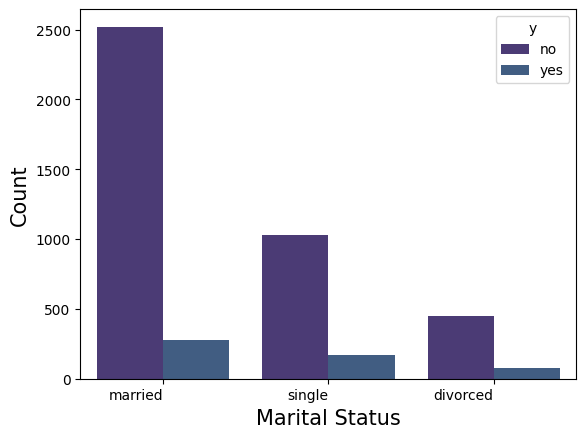

In [208]:
sns.countplot(x ='marital', hue = 'y', data =df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Marital Status', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [209]:
(df[df['y'] == 'yes']['marital'].value_counts() / 521 )*100

marital
married     53.166987
single      32.053743
divorced    14.779271
Name: count, dtype: float64

- 52% of subscribers are married.
- 85% of subscribers are either married or single.

#### Relation Between Highest Education Degree and Subscription

Text(0, 0.5, 'Count')

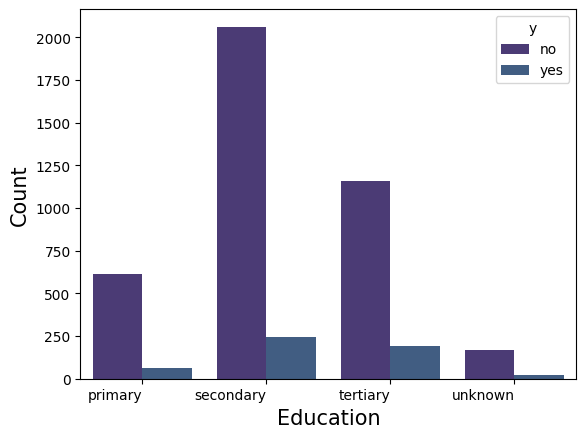

In [210]:
sns.countplot(x ='education', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Education', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [211]:
(df[df['y'] == 'yes']['education'].value_counts() / 521 )*100

education
secondary    47.024952
tertiary     37.044146
primary      12.284069
unknown       3.646833
Name: count, dtype: float64

- 47% of subscribers have secondary education.
- 84% of subscribers have secondary and tertiary education.

#### Relation Between Defaulters and Subscribers

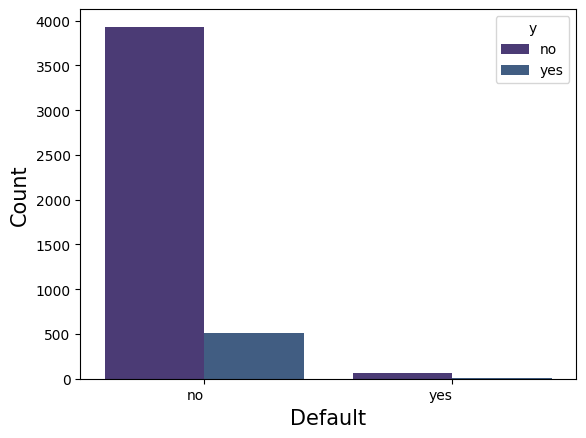

In [212]:
sns.countplot(x ='default', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Default', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

- 98% of subscribers are non-defaulters.

#### Binning of Balance for Analysis

In [213]:
balance_train = []
for i in df['balance']:
    if (i >= -14999 and i <= 0):
        balance_train.append('Negative Balance')
    elif (i >= 1 and i <= 15000):
        balance_train.append('0K - 15K')
    elif (i >= 15001 and i <= 30000):
        balance_train.append('15K - 30K')
    elif (i >= 30001 and i <= 45000):
        balance_train.append('30K - 45K')
    elif (i >= 45001 and i <= 60000):
        balance_train.append('45K - 60K')
    elif (i >= 60001 and i <= 75000):
        balance_train.append('60K - 75K')
    elif (i >= 75001 and i <= 90000):
        balance_train.append('75K - 90K')
    elif (i >= 90001 and i <= 105000):
        balance_train.append('90K - 105K')
    else:
        pass
df['balance_group'] = balance_train

#### Relation Between Balance and Subscription

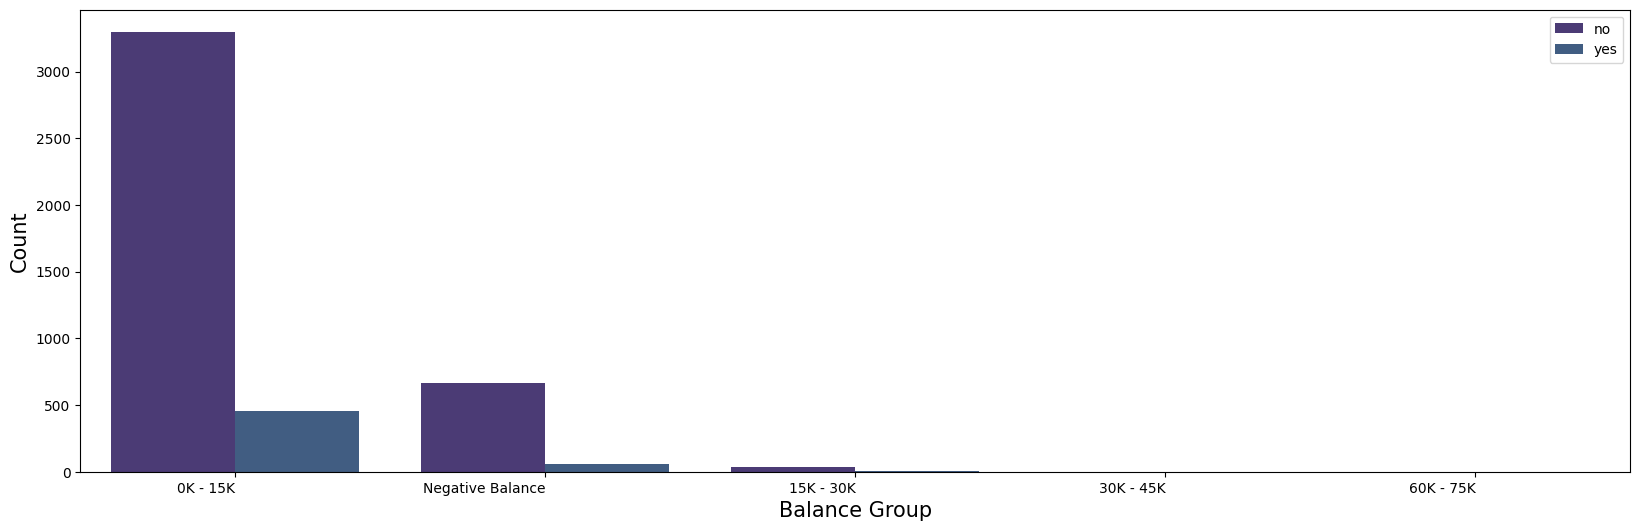

In [214]:
plt.figure(figsize = (20, 6))
sns.countplot(x ='balance_group', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

In [215]:
(df[df['y'] == 'yes']['balance_group'].value_counts() / 521 ) *100

balance_group
0K - 15K            88.099808
Negative Balance    11.516315
15K - 30K            0.383877
Name: count, dtype: float64

- 88% of the subscribers have bank balance between 0-15K.

####  Balance

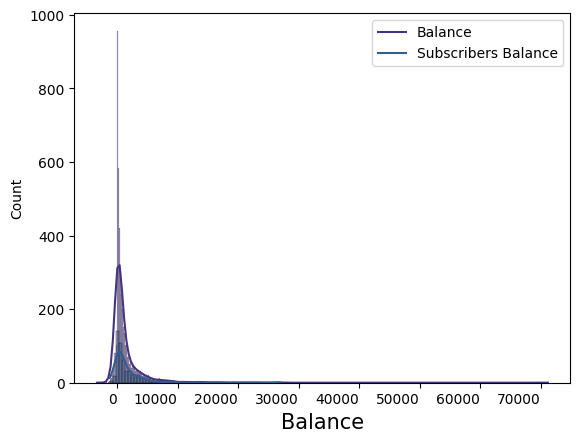

In [216]:
sns.histplot((df['balance'])  , kde=True)
sns.histplot((df[df['y'] == 'yes']['balance'])  , kde=True)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Balance', fontsize = 15)
plt.legend(['Balance', 'Subscribers Balance'])
plt.show()
df['balance'] = df['balance'] 
df['balance'] = df['balance'].fillna(df['balance'].mean())


#### Relationship Between Housing Loan and Subscription

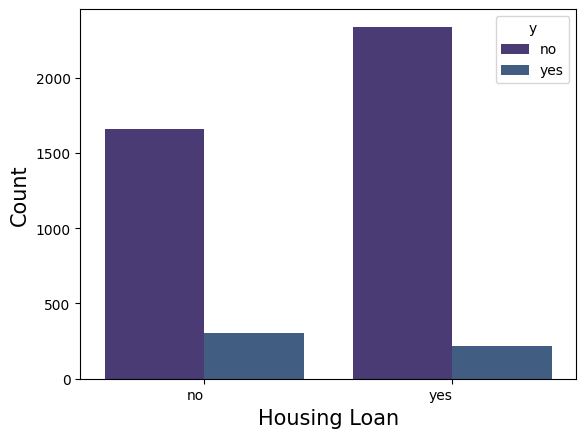

In [217]:
sns.countplot(x ='housing', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Housing Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [218]:
(df[df['y'] == 'yes']['housing'].value_counts() / 521 ) *100

housing
no     57.773512
yes    42.226488
Name: count, dtype: float64

 - 57% of subscribers don't have housing loan.
 - 43% of subscribers  have housing loan.

#### Relationship Between Personal Loan and Subscription

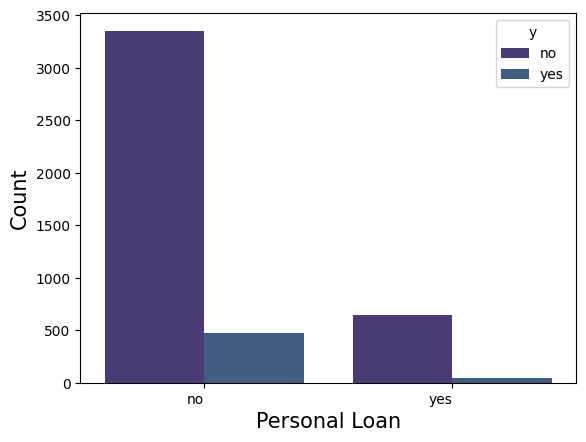

In [219]:
sns.countplot(x ='loan', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Personal Loan', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [220]:
(df[df['y'] == 'yes']['loan'].value_counts() / 521 ) *100

loan
no     91.746641
yes     8.253359
Name: count, dtype: float64

- 91% of subscribers don't have personal loan.

#### Relationship Between Medium of Contact and Subscription

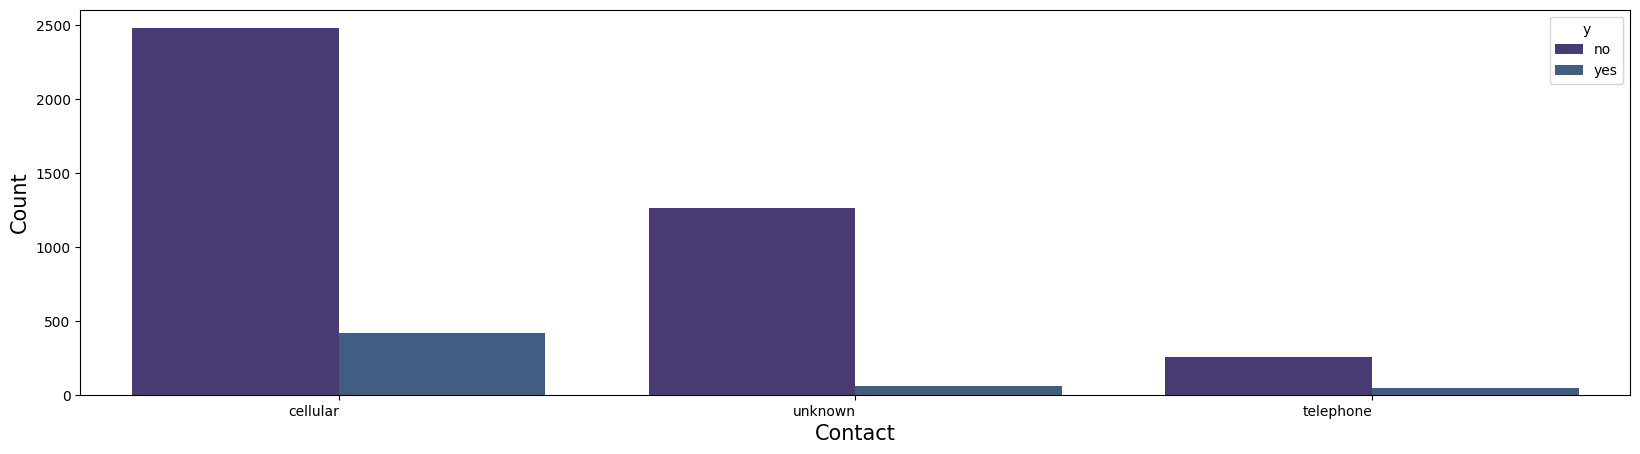

In [221]:
plt.figure(figsize=(20,5))

sns.countplot(x ='contact', hue = 'y', data =df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Contact', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [222]:
(df[df['y'] == 'yes']['contact'].value_counts() / 521 ) *100

contact
cellular     79.846449
unknown      11.708253
telephone     8.445298
Name: count, dtype: float64

- 79% of subscribers were contacted over cellular network.

#### Relation Between The Week in which The Customer was Contacted and Subscription

In [223]:
#  Categorizing Date Column Into Week
week_train = []
for i in df['day']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df['week'] = week_train
df_train = df.drop('day', axis = 1)

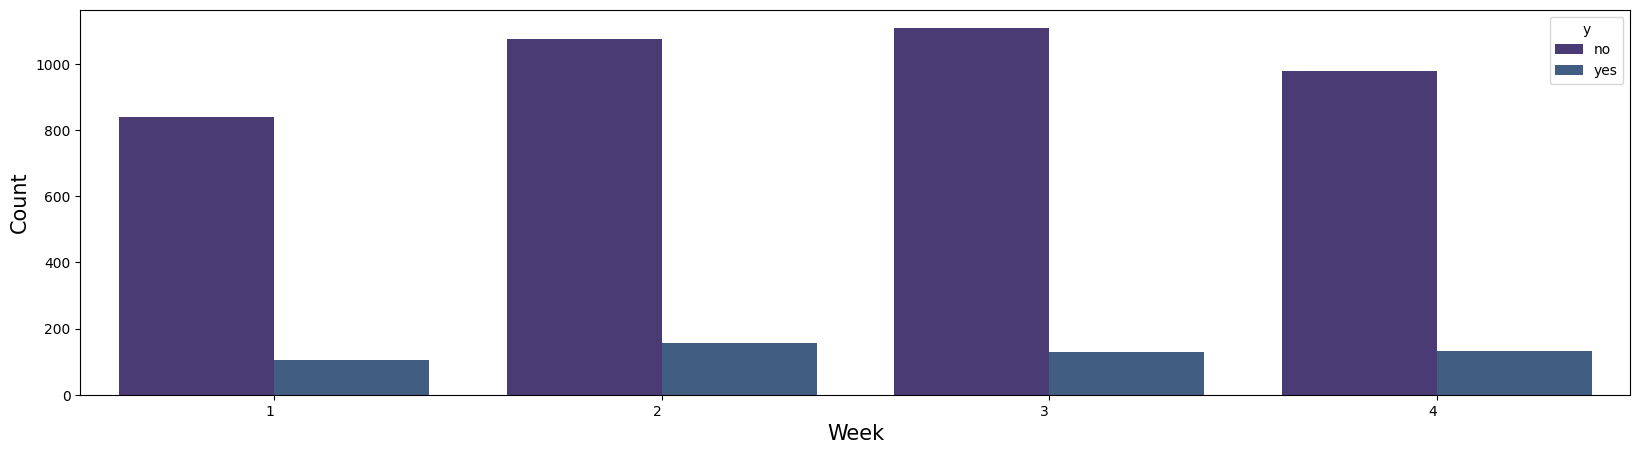

In [224]:
plt.figure(figsize=(20,5))
sns.countplot(x ='week', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Week', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [225]:
(df[df['y'] == 'yes']['week'].value_counts() / 521 ) *100

week
2    29.942418
4    25.143954
3    24.760077
1    20.153551
Name: count, dtype: float64

- 29% of subscribers are contacted in the second week of the month.
- 50% of subscribers are contacted in the first half of the month.

#### Relation Between The Month in which The Customer was Contacted and Subscription

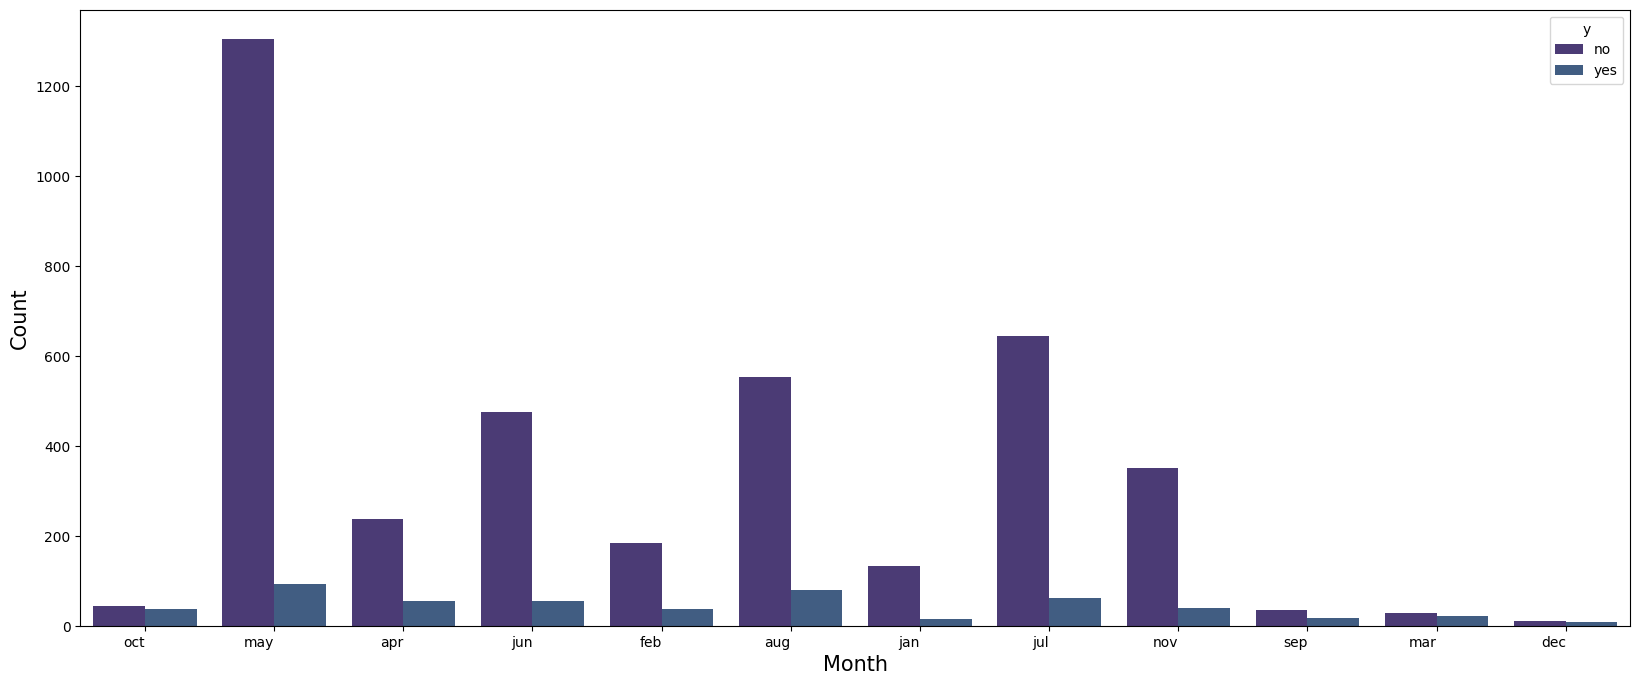

In [226]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='month', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [227]:
(df[df['y'] == 'yes']['month'].value_counts() / 521 ) *100

month
may    17.850288
aug    15.163148
jul    11.708253
apr    10.748560
jun    10.556622
nov     7.485605
feb     7.293666
oct     7.101727
mar     4.030710
sep     3.262956
jan     3.071017
dec     1.727447
Name: count, dtype: float64

- 18% of subscribers are contacted in may.
- 64% of subscribers are contacted in between april to august.
- 54% of subscribers are contacted in the first half of the year.

#### Binning of Duration of Contact for Analysis


In [228]:
duration_train = []
for i in df['duration']:
    if (i >= 0 and i <= 500):
        duration_train.append('0-500')
    elif (i >= 501 and i <= 1000):
        duration_train.append('501-1000')
    elif (i >= 1001 and i <= 1500):
        duration_train.append('1001-1500')
    elif (i >= 1501 and i <= 2000):
        duration_train.append('1501-2000')
    elif (i >= 2001 and i <= 2500):
        duration_train.append('2001 - 2500')
    elif (i >= 2501 and i <= 3000):
        duration_train.append('2501-3000')
    elif (i >= 3001 and i <= 3500):
        duration_train.append('3001-3500')
    elif (i >= 3501 and i <= 4000):
        duration_train.append('3501-4000')
    elif (i >= 4001 and i <= 4500):
        duration_train.append('4001-4500')
    elif (i >= 4501 and i <= 5000):
        duration_train.append('4501-5000')
    else:
        pass
df['duration_group'] = duration_train

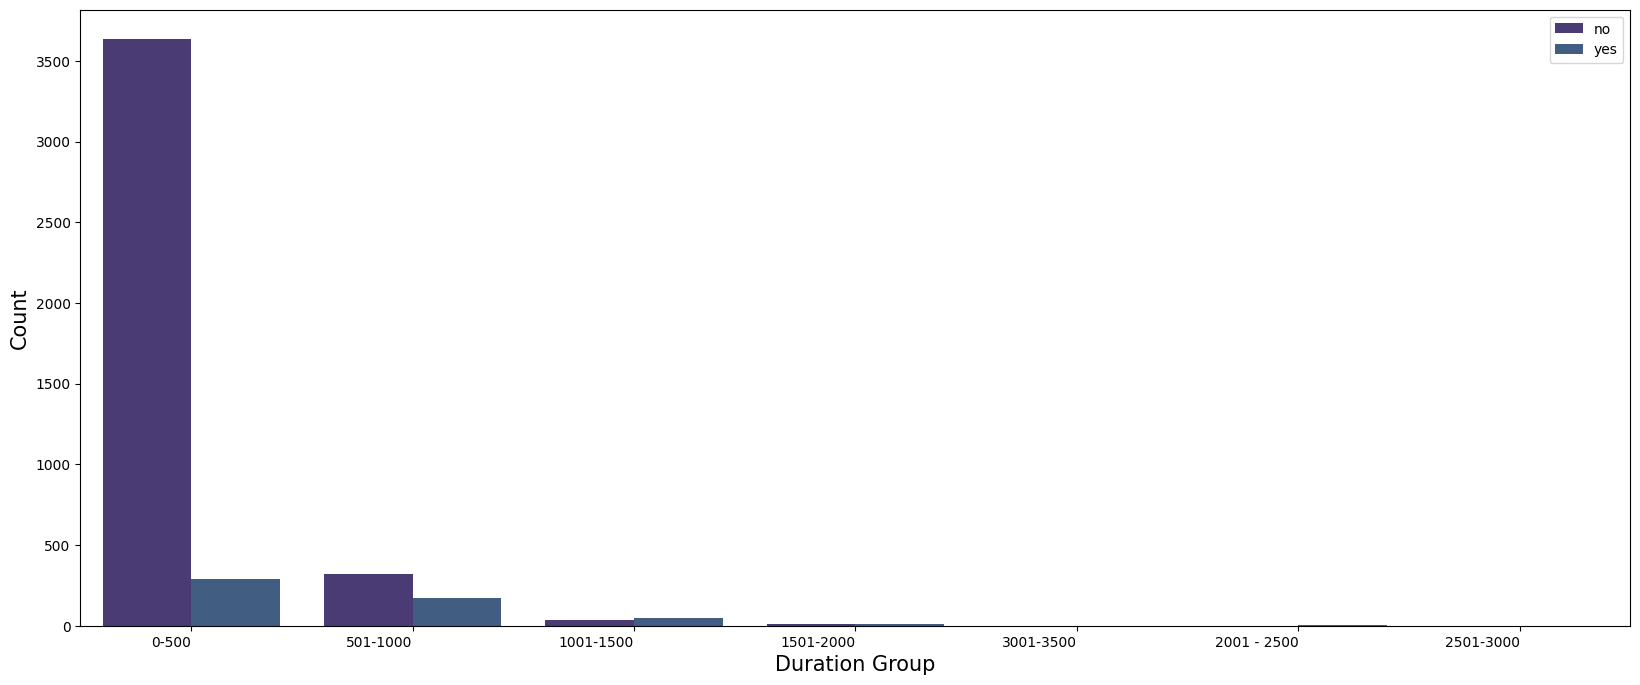

In [229]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='duration_group', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

In [230]:
(df[df['y'] == 'yes']['duration_group'].value_counts() / 521 ) *100

duration_group
0-500          55.854127
501-1000       32.437620
1001-1500       8.829175
1501-2000       2.111324
2001 - 2500     0.575816
2501-3000       0.191939
Name: count, dtype: float64

- 55% of the subscribers have contact duration of less than 500 seconds.
- 88% of the subscribers have contact duration of less than 1000 seconds.

#### Distribution of Duration of Contact

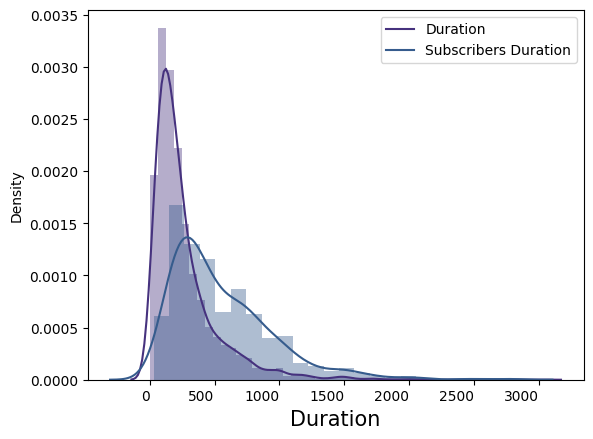

In [231]:
sns.distplot(df_train['duration'])
sns.distplot(df[df['y'] == 'yes']['duration'])
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Duration', fontsize = 15)
plt.legend(['Duration', 'Subscribers Duration'])
plt.show()

#### Binning of Number of Times a Subscriber Contacted in Previous Campaign for Analysis

In [232]:
campaign_train = []
for i in df['campaign']:
    if (i >= 1 and i <= 7):
        campaign_train.append('1-7')
    elif (i >= 8 and i <= 14):
        campaign_train.append('8-14')
    elif (i >= 15 and i <= 21):
        campaign_train.append('15-21')
    elif (i >= 22 and i <= 28):
        campaign_train.append('22-28')
    elif (i >= 29 and i <= 35):
        campaign_train.append('29-35')
    elif (i >= 36 and i <= 42):
        campaign_train.append('36-42')
    elif (i >= 43 and i <= 49):
        campaign_train.append('43-49')
    elif (i >= 50 and i <= 56):
        campaign_train.append('50-56')
    elif (i >= 57 and i <= 63):
        campaign_train.append('57-63')
    else:
        pass
df['campaign_group'] = campaign_train

#### Relation Between Number of Times a Subscriber Contacted in Previous Campaign and Subscription

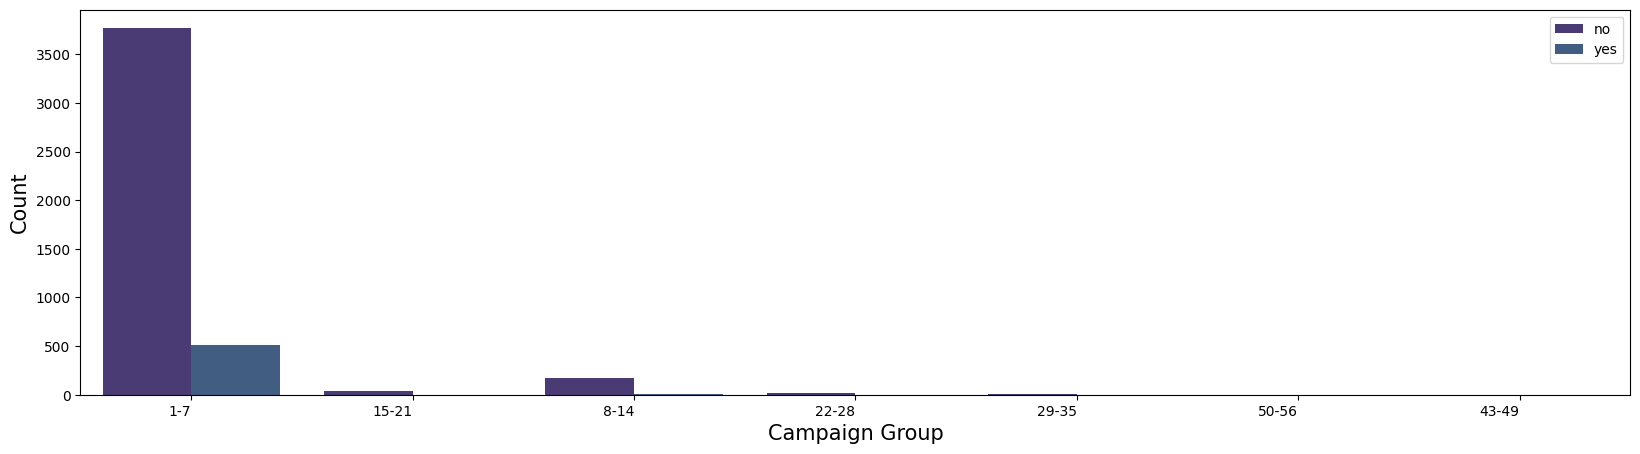

In [233]:
plt.figure(figsize = (20, 5))
sns.countplot(x ='campaign_group', hue= 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Campaign Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.legend(loc = 'upper right')
plt.show()

- 98% of subscribers have been contacted maximum 7 times.

#### Changing -1 to 0 in Days Passed Since Last Contact

In [234]:
pdays_train = []
for i in df['pdays']:
    if i < 0:
        pdays_train.append(0)
    else:
        pdays_train.append(i)
df['pdays'] = pdays_train


**Binning of Days Passed Since Last Contact for Analysis**

In [235]:
pdays_train = []
for i in df['pdays']:
    if (i >= 0 and i <= 100):
        pdays_train.append('1-100')
    elif (i >= 101 and i <= 200):
        pdays_train.append('101-200')
    elif (i >= 201 and i <= 300):
        pdays_train.append('201-300')
    elif (i >= 301 and i <= 400):
        pdays_train.append('301-400')
    elif (i >= 401 and i <= 500):
        pdays_train.append('401-500')
    elif (i >= 501 and i <= 600):
        pdays_train.append('501-600')
    elif (i >= 601 and i <= 700):
        pdays_train.append('601-700')
    elif (i >= 701 and i <= 800):
        pdays_train.append('701-800')
    elif (i >= 801 and i <= 900):
        pdays_train.append('801-900')
    else:
        pass
df['pdays_group'] = pdays_train

#### Relation Between Days Passed Since Last Contact and Subscription

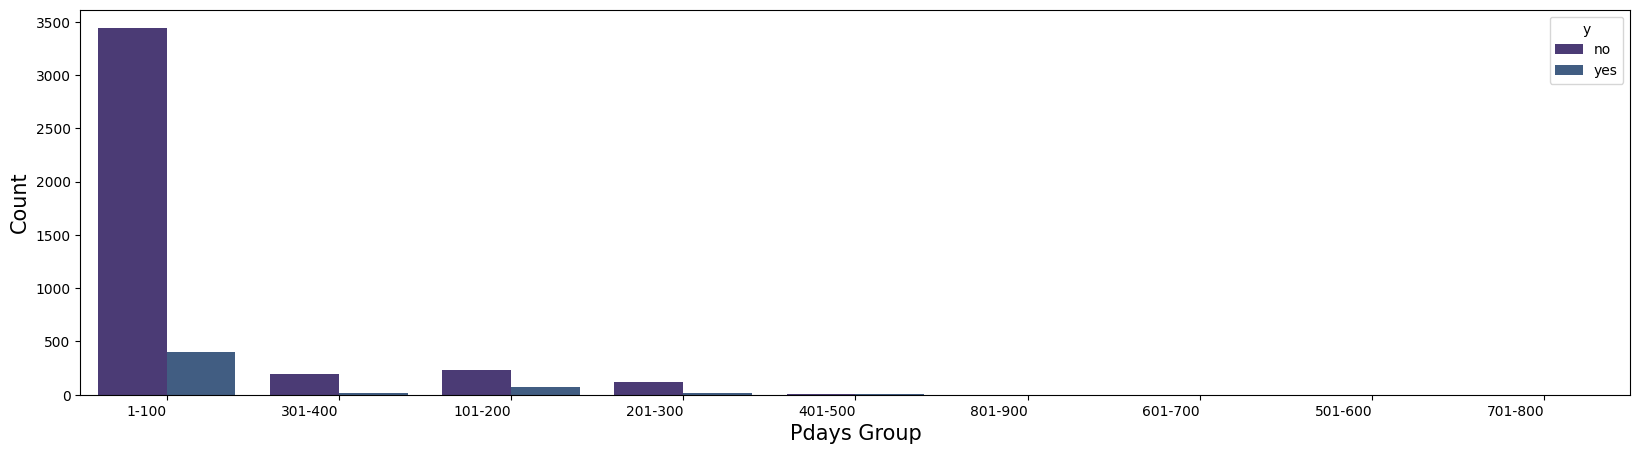

In [236]:
plt.figure(figsize = (20, 5))
sns.countplot(x ='pdays_group', hue= 'y', data =df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

- 76% of subscribers have been previously contacted within 100 days.
- 90% of subscribers have been previously contacted within 200 days.

#### Distribution of Days Passed Since Last Contact

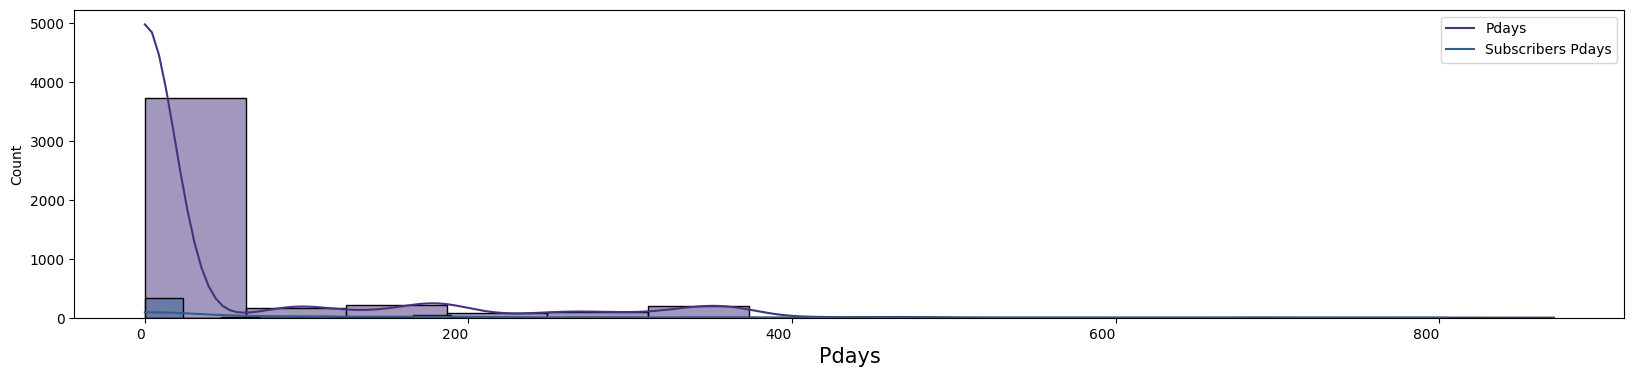

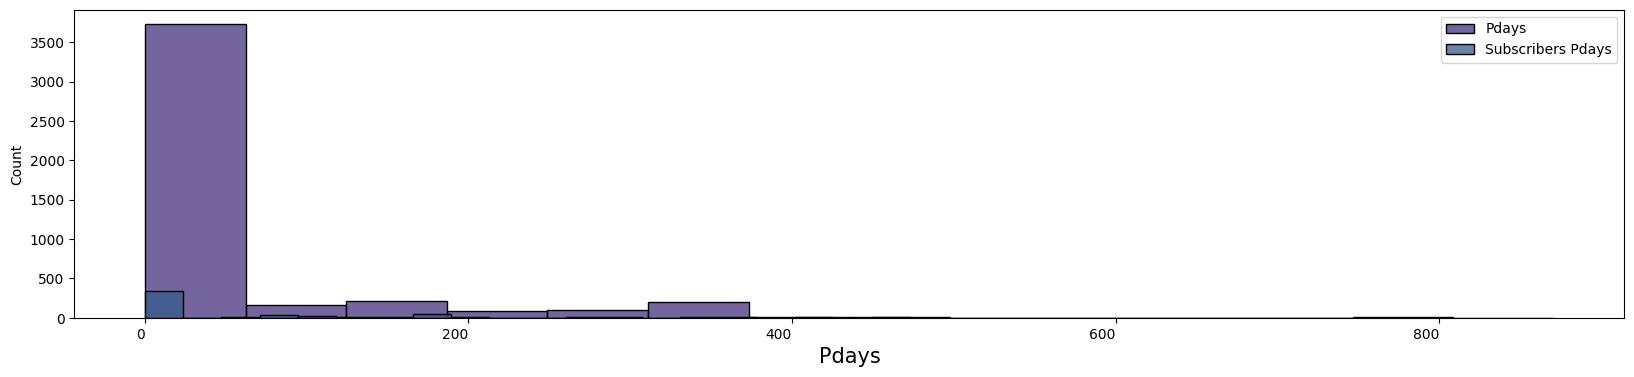

In [237]:

plt.figure(figsize=(20,4))
sns.histplot(df['pdays'], kde=True)
sns.histplot(df[df['y'] == 'yes']['pdays'] ,kde=True)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()

plt.figure(figsize=(20,4))
sns.histplot(df['pdays'], kde = False)
sns.histplot(df[df['y'] == 'yes']['pdays'], kde = False)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Pdays', fontsize = 15)
plt.legend(['Pdays', 'Subscribers Pdays'])
plt.show()



#### Binning Number of Times Subscriber is Contacted in Past

In [238]:
previous_train = []
for i in df['previous']:
    if (i >= 0 and i <= 5):
        previous_train.append('1-5')
    elif (i >= 6 and i <= 10):
        previous_train.append('6-10')
    elif (i >= 11 and i <= 15):
        previous_train.append('11-15')
    elif (i >= 16 and i <= 20):
        previous_train.append('16-20')
    elif (i >= 21 and i <= 25):
        previous_train.append('21-25')
    else:
        pass
df['previous_groups'] = previous_train

**Relation Between Number of Times Subscriber is Contacted in Past and Subscription**

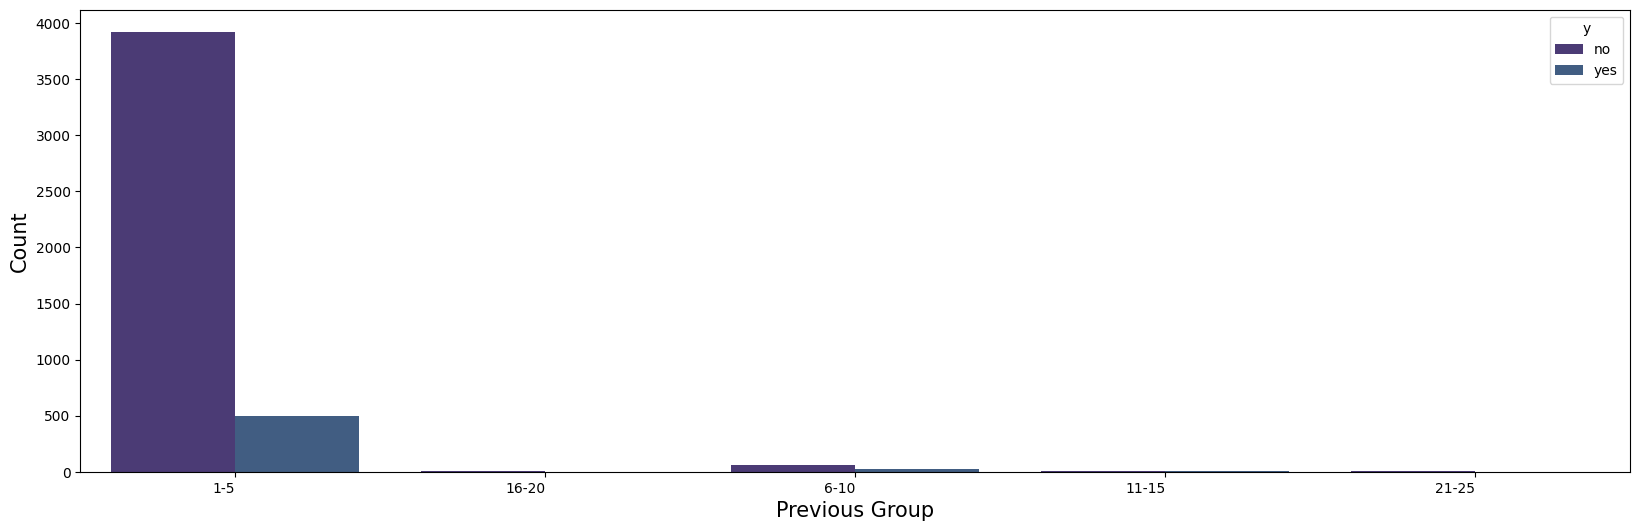

In [239]:
plt.figure(figsize = (20, 6))
sns.countplot(x ='previous_groups', hue= 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous Group', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

**Almost all the subscribers were contacted 10 or less than 10 times in the past.**

#### Relation Between Previous Outcome and Subscription

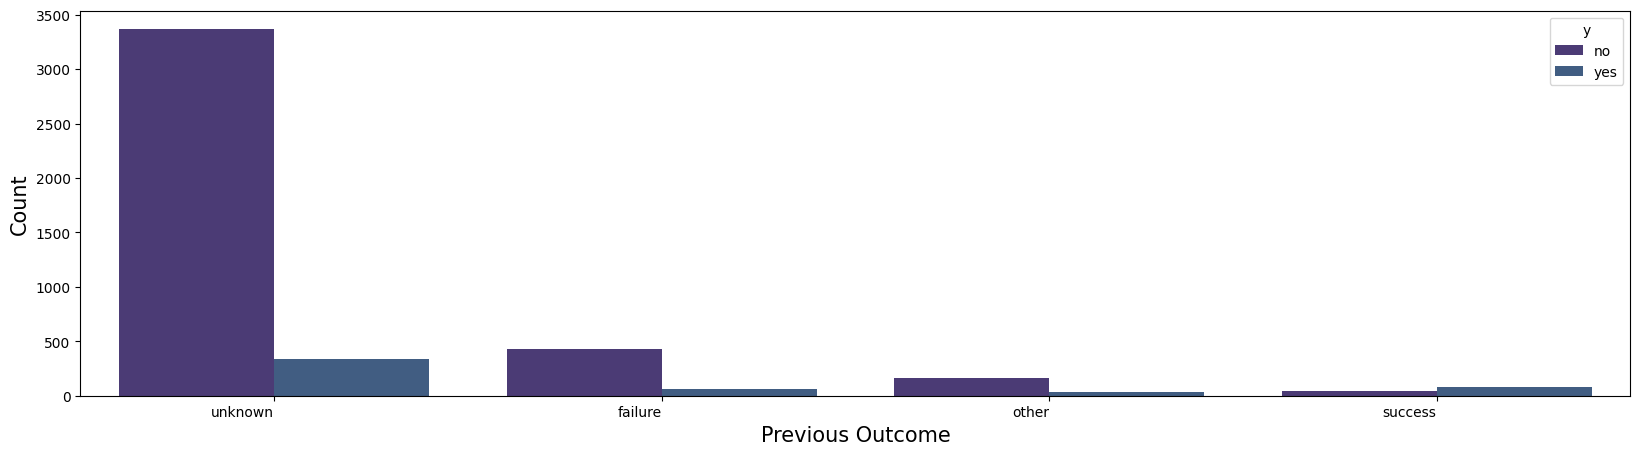

In [240]:
plt.figure(figsize=(20,5))
sns.countplot(x ='poutcome', hue = 'y', data = df)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Previous Outcome', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

In [241]:
(df[df['y'] == 'yes']['poutcome'].value_counts() / 521 ) *100

poutcome
unknown    64.683301
success    15.930902
failure    12.092131
other       7.293666
Name: count, dtype: float64

- 64% of people have subscribed for which previous outcome of campaign is unknown. 
- 15% of subscribers were  subscribers previously, and also now they have subscribed.
- 12% of people were  non - subscribers previously,   now they have subscribed

#

## Key-Findings.

##### Low Subscription Rate: Around 12% of all individuals have subscribed to the term deposit.

##### Age Distribution & Subscription:

- Younger and older age groups tend to have lower chances of subscribing.
- 28% of subscribers are between 26-33 years old.
- 57% of subscribers are between 26-41 years old.
- 72% of subscribers are between 26-49 years old.
- 85% of subscribers are between 26-57 years old.
- Subscribers tend to be between 27-65 years old; those outside this range are rare.
- The age distribution of subscribers resembles a near-normal distribution.

##### Occupation & Subscription:

- 25% of subscribers have a management job.
- 41% of subscribers have management or technician jobs.
- 54% of subscribers have management, technician, or blue-collar jobs.
- 66% of subscribers have management, technician, blue-collar, or admin jobs.
- 76% of subscribers have one of the above jobs or are retired.

##### Marital Status:

- 52% of subscribers are married.
- 85% of subscribers are either married or single.

##### Education:

- 47% of subscribers have secondary education.
- 84% of subscribers have secondary or tertiary education.

#### Credit Default:

- 98% of subscribers are non-defaulters.


##### Bank Balance:

- 88% of subscribers have a bank balance between 0-15K.

##### Housing Loan:

- 57% of subscribers do not have a housing loan.
- 43% of subscribers have a housing loan.

##### Personal Loan:

- 91% of subscribers do not have a personal loan.

##### Contact Method:

- 79% of subscribers were contacted via cellular network.

##### Month of Contact:

- 29% of subscribers were contacted in the second week of the month.
- 50% of subscribers were contacted in the first half of the month.
- 18% of subscribers were contacted in May.
- 64% of subscribers were contacted between April and August.
- 54% of subscribers were contacted in the first half of the year.

##### Contact Duration:

- 55% of subscribers had a contact duration of less than 500 seconds.
- 88% of subscribers had a contact duration of less than 1000 seconds.

##### Previous Contact:

- 98% of subscribers were contacted a maximum of 7 times.
- 76% of subscribers had been previously contacted within 100 days.
- 90% of subscribers had been previously contacted within 200 days.
- Almost all subscribers were contacted 10 times or fewer in the past.

#####  Previous Outcome of Campaign:

- 64% of subscribers have an unknown previous outcome.
- 15% of subscribers were previous subscribers and are subscribed again.
- 12% of subscribers were non-subscribers previously and are now subscribed.


### -------------------------|
## Model Building           
### -------------------------|

### We will build a Decision - Tree Classifier..

In [242]:
#  Drop columns that are not useful for prediction
columns_to_drop = ['day', 'month', 'poutcome', 'age_group', 'balance_group', 'week', 'duration_group', 'campaign_group', 'pdays_group', 'previous_groups']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [243]:
#  Define features and target
X = df.drop(columns=['y'])  # All features except the target
y = df['y']  # Target variable

In [244]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [245]:
#  Preprocessing steps - Imputation and OneHotEncoding for categorical features
categorical_columns = X.select_dtypes(include=['object']).columns  # Identify categorical columns
numerical_columns = X.select_dtypes(exclude=['object']).columns  # Identify numerical columns


# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),  # Handle missing numerical values
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # OneHotEncoding for categorical variables
        ]), categorical_columns)
    ])

In [246]:
#  Apply SMOTE to the training data (before fitting the model)
smote = SMOTE(random_state=42)

In [ ]:
#  Create a  pipeline with preprocessor 
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
])

In [248]:
# Fit the preprocessor and then apply SMOTE to the training data
X_train_transformed = pipeline.fit_transform(X_train)

In [249]:
#  Apply SMOTE to balance the classes in the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

#  Train the model with Decision Tree Classifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_smote, y_train_smote)

#  Make predictions on the test set
X_test_transformed = pipeline.transform(X_test)
y_pred = classifier.predict(X_test_transformed)

#  Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

In [ ]:

# Precision, recall, f1 for class 'yes'
precision = precision_score(y_test, y_pred, pos_label='yes')  
recall = recall_score(y_test, y_pred, pos_label='yes')        
f1 = f1_score(y_test, y_pred, pos_label='yes')                

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8597
Precision: 0.3717
Recall: 0.4286
F1-Score: 0.3981
Classification Report:
               precision    recall  f1-score   support

          no       0.93      0.91      0.92       807
         yes       0.37      0.43      0.40        98

    accuracy                           0.86       905
   macro avg       0.65      0.67      0.66       905
weighted avg       0.87      0.86      0.86       905

Confusion Matrix:
 [[736  71]
 [ 56  42]]


**Since we are dealing with a highly imbalanced dataset, recall for the "yes" class (the minority class) should be our primary focus. 
Recall measures the ability of the model to correctly identify all the positive cases (subscribers, in this case), which is crucial in
many business and real-world applications. However, improving recall can often lead to a decrease in precision, and vice versa, so
we need to find a balance.**

## Hyper - Parameter Tuning

In [251]:
# Adjusting the pipeline to try different strategies for SMOTE and a deeper decision tree
# Define the Decision Tree classifier with class_weight='balanced'
dt_classifier = DecisionTreeClassifier(random_state=42, class_weight='balanced')



# Create the preprocessor (StandardScaler for numerical, OneHotEncoder for categorical)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  
        ('cat', OneHotEncoder(), categorical_columns)  
    ]
)
# Create an imbalanced pipeline with preprocessing, SMOTE, and classifier
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42, sampling_strategy=0.7)),  # Increasing SMOTE strategy to 0.7
    ('classifier', dt_classifier)
])

# Define hyperparameter grid for deeper trees and different SMOTE strategy
param_grid = {
    'classifier__max_depth': [5, 10, 15, None],  # Trying deeper trees
    'classifier__min_samples_split': [2, 5, 10],  # Allowing more splits
    'classifier__min_samples_leaf': [1, 2, 4],  # Control leaf size
    'classifier__criterion': ['gini', 'entropy']
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from GridSearchCV
print("Best Hyperparameters:", grid_search.best_params_)

# Step 5: Evaluate the model with the best hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model using classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Hyperparameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Classification Report:
               precision    recall  f1-score   support

          no       0.98      0.72      0.83       807
         yes       0.27      0.86      0.41        98

    accuracy                           0.74       905
   macro avg       0.63      0.79      0.62       905
weighted avg       0.90      0.74      0.79       905

Confusion Matrix:
 [[584 223]
 [ 14  84]]


#

### Best Hyperparameters:

The best hyperparameters found through GridSearchCV for the Decision Tree model were:

- Criterion: gini
- Max Depth: 5
- Min Samples Split: 2
- Min Samples Leaf: 1

#### Model Performance (Classification Report):

- After applying SMOTE (Synthetic Minority Over-sampling Technique) and fine-tuning the Decision Tree, the classification report shows the following performance on the test set:

#### Class '0' (no):
- Precision: 0.98 — The model is very good at predicting 'no' correctly.
- Recall: 0.72 — The model correctly identifies 72% of the actual 'no' instances.
- F1-Score: 0.83 — A high score indicating a good balance between precision and recall for the 'no' class.

#### Class '1' (yes):
- Precision: 0.27 — The model has a lower precision for 'yes', meaning it tends to incorrectly predict 'yes' for many 'no' instances.
- Recall: 0.86 — The model correctly identifies 86% of the actual 'yes' instances, but at the cost of many false positives.
- F1-Score: 0.41 — A low score for 'yes' indicating that while recall is high, precision is much lower.

#### Confusion Matrix:
- True Positives (TP): 84 (correctly predicted 'yes')
- False Positives (FP): 223 (predicted 'yes', but actually 'no')
- True Negatives (TN): 584 (correctly predicted 'no')
- False Negatives (FN): 14 (predicted 'no', but actually 'yes')

#### Overall Model Accuracy:
Accuracy: 0.74 — The model correctly predicts 74% of the cases in the test set, but accuracy may not fully capture performance due to class imbalance.

### Key Insights:
Precision vs. Recall Trade-off:

- Precision for the 'yes' class is quite low, meaning the model is generating a high number of false positives.
- Recall for the 'yes' class is high (0.86), meaning the model is good at detecting 'yes' instances, but this comes at the cost of low precision.

#### SMOTE Impact:

- By using SMOTE, we tried to balance the dataset, but the model still struggles with false positives in the minority class.

#### Imbalanced Classes:

The model seems to perform better on the majority class (class '0'), as expected in imbalanced classification problems.
